### 1 Dimensional Reduction with PCA

a) Procedure:
* Compute the sample mean and **covariance** S
* Compute first few eigenvectors of the sample covariance (new coordinate)

    $ u_1,...,u_m$ where $M \ll D$
* Project data points onto the new coordinates to obtain lower dimensional representations

    $ {\~{x}}_{n1} = {u^{T}_1}{x_n} $
    
    $ {\~{x}}_{n} $ $\in {\mathbb{R}}^{M}$ vs. $ x_n $ $ \in {\mathbb{R}}^{D} $

b)

In [1]:
#import required libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# importing or loading the dataset
df = pd.read_csv('url-data.txt')
X = df.iloc[:,1:].values


In [3]:
# scaled the dataset
X_sc = StandardScaler().fit_transform(X)

In [4]:
X_sc

array([[-0.65466981, -0.5912059 ,  0.08517171, ..., -0.12874791,
        -0.16518144, -0.04476615],
       [ 1.71777468, -0.10030701,  1.13667433, ..., -0.21184327,
        -0.16518144, -0.04476615],
       [-0.21764057,  0.71785781, -0.96633091, ..., -0.23954172,
        -0.16518144, -0.04476615],
       ...,
       [-0.46737157, -0.10030701,  0.08517171, ..., -0.23954172,
        -0.16518144, -0.04476615],
       [-0.90440081, -1.08210479, -0.96633091, ..., -0.23954172,
        -0.16518144, -0.04476615],
       [-0.34250607,  0.22695892,  0.08517171, ..., -0.20261045,
        -0.16518144, -0.04476615]])

In [5]:
# %% Apply PCA
pca = PCA(n_components=64)
principalComponents_sc = pca.fit_transform(X_sc)
eigenvalues = pca.explained_variance_
variance = pca.explained_variance_ratio_

In [6]:
variance

array([2.09718209e-01, 1.62187440e-01, 1.00293600e-01, 5.75178919e-02,
       5.64104121e-02, 4.94719845e-02, 4.62247327e-02, 4.15148628e-02,
       3.50782853e-02, 2.61653772e-02, 2.53871782e-02, 2.25283807e-02,
       1.82678514e-02, 1.80924284e-02, 1.41391248e-02, 1.32553472e-02,
       1.27190041e-02, 1.18195690e-02, 1.12062129e-02, 9.23924888e-03,
       8.55045544e-03, 7.80587291e-03, 6.88283285e-03, 6.67642002e-03,
       5.25645583e-03, 4.90364174e-03, 4.32010750e-03, 3.70015570e-03,
       3.53175659e-03, 2.67358125e-03, 1.53349027e-03, 1.16725876e-03,
       7.70470318e-04, 3.20797051e-04, 3.03328910e-04, 2.14347689e-04,
       1.51886015e-04, 4.13596240e-32, 1.77684275e-32, 3.66707642e-33,
       3.19302059e-33, 9.09966822e-34, 9.09966822e-34, 9.09966822e-34,
       9.09966822e-34, 9.09966822e-34, 9.09966822e-34, 9.09966822e-34,
       9.09966822e-34, 9.09966822e-34, 9.09966822e-34, 9.09966822e-34,
       9.09966822e-34, 9.09966822e-34, 9.09966822e-34, 9.09966822e-34,
      

In [7]:
#function to find the minimum number of principal components that maintain % of the variance
def minimum_principal_components(arr, percentage):
    sum_variance = 0.0
    num_principal_components = 0
    for i in range (0, len(arr)):
        sum_variance += arr[i]
        if sum_variance < percentage:
            num_principal_components += 1
        else:
            print('Total variance: ', sum_variance)
            num_principal_components += 1
            print('Number of principal components: ', num_principal_components)
            return num_principal_components

The minimum number of principal components that maintain 95% of the variance:

In [8]:
num_95 = minimum_principal_components(variance, 0.95)

Total variance:  0.957593469505552
Number of principal components:  22


The minimum number of principal components that maintain 99% of the variance:

In [9]:
num_99 = minimum_principal_components(variance, 0.99)

Total variance:  0.9928648397364542
Number of principal components:  29


c)

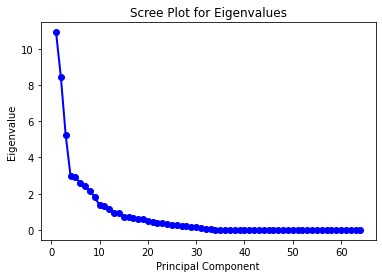

In [10]:
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot for Eigenvalues')
plt.show()